In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import warnings
import itertools
import matplotlib
from pylab import rcParams

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
data = pd.read_csv('EIA Data Sets/Data/net_generation.csv')
data.head()

,Date,"Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)","Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)","Net energy for electricity load, United States, Monthly (billion kilowatthours)","Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)","Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)","Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other nonrenewable fuels, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other gases, United States, Monthly (billion kilowatthours)","Electric power sector net generation from petroleum, United States, Monthly (billion kilowatthours)","Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)","Electric power sector net generation from utility-scale solar, United States, Monthly (billion kilowatthours)","Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)","Electric power sector net generation from wind, United States, Monthly (billion kilowatthours)"
0,12/1/2020,1.862813,70.54828,326.5772,1.512993,-0.496784,23.82805,116.4394,72.54646,0.640074,0.428227,1.589645,64.88192,5.012265,326.5772,32.66580
1,11/1/2020,1.638054,55.38093,292.8734,1.431412,-0.336250,20.84670,111.2597,66.10233,0.605994,0.317438,1.562592,57.98058,5.924216,292.8734,28.14019
2,10/1/2020,2.264039,57.85693,306.3560,1.337518,-0.442759,19.63240,126.3004,61.42273,0.613575,0.156562,1.326140,59.12239,7.522503,306.3560,28.36593
3,9/1/2020,1.954046,63.53742,318.2363,1.379625,-0.620189,18.59246,136.5059,63.85781,0.327863,0.345714,1.804214,52.47764,8.976820,318.2363,21.57470
4,8/1/2020,2.114324,93.90338,388.0824,1.376648,-0.752724,21.51756,162.1831,70.26038,0.490478,0.413946,1.889336,59.69450,9.742568,388.0824,24.94340


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
df = data.set_index('Date')
df

,"Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)","Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)","Net energy for electricity load, United States, Monthly (billion kilowatthours)","Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)","Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)","Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other nonrenewable fuels, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other gases, United States, Monthly (billion kilowatthours)","Electric power sector net generation from petroleum, United States, Monthly (billion kilowatthours)","Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)","Electric power sector net generation from utility-scale solar, United States, Monthly (billion kilowatthours)","Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)","Electric power sector net generation from wind, United States, Monthly (billion kilowatthours)"
Date,,,,,,,,,,,,,,,
2020-12-01,1.862813,70.548280,326.5772,1.512993,-0.496784,23.828050,116.439400,72.546460,0.640074,0.428227,1.589645,64.88192,5.012265,326.5772,32.665800
2020-11-01,1.638054,55.380930,292.8734,1.431412,-0.336250,20.846700,111.259700,66.102330,0.605994,0.317438,1.562592,57.98058,5.924216,292.8734,28.140190
2020-10-01,2.264039,57.856930,306.3560,1.337518,-0.442759,19.632400,126.300400,61.422730,0.613575,0.156562,1.326140,59.12239,7.522503,306.3560,28.365930
2020-09-01,1.954046,63.537420,318.2363,1.379625,-0.620189,18.592460,136.505900,63.857810,0.327863,0.345714,1.804214,52.47764,8.976820,318.2363,21.574700
2020-08-01,2.114324,93.903380,388.0824,1.376648,-0.752724,21.517560,162.183100,70.260380,0.490478,0.413946,1.889336,59.69450,9.742568,388.0824,24.943400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-05-01,1.744683,150.043237,NaN,1.071382,-0.622526,18.875194,44.283321,61.512445,NaN,0.050532,9.933711,NaN,NaN,NaN,0.635029
2001-04-01,1.657999,139.033764,NaN,1.094990,-0.795915,17.722778,39.413096,56.003026,NaN,0.043303,10.415996,NaN,NaN,NaN,0.684694
2001-03-01,1.746260,153.452065,NaN,1.190022,-0.773345,20.132660,37.452990,62.140712,NaN,0.045323,11.206700,NaN,NaN,NaN,0.532120


In [4]:
price = pd.read_csv('EIA Data Sets/Data/prices.csv')
price['Date'] = pd.to_datetime(price['Date'])
price_df = price.set_index('Date')
price_df

,"Retail Price of Electricity for All Sectors, U.S. Total, Monthly (cents per kilowatt hour)"
Date,
1990-01-01,6.27000
1990-02-01,6.34000
1990-03-01,6.37000
1990-04-01,6.35000
1990-05-01,6.46000
...,...
2020-08-01,11.12406
2020-09-01,10.81302
2020-10-01,10.57964


In [5]:
price_gen = pd.merge(price_df,df, on='Date')
price_gen = price_gen.loc['2010-01-01':'2019-10-31']
price_gen.tail()

,"Retail Price of Electricity for All Sectors, U.S. Total, Monthly (cents per kilowatt hour)","Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)","Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)","Net energy for electricity load, United States, Monthly (billion kilowatthours)","Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)","Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)","Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other nonrenewable fuels, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other gases, United States, Monthly (billion kilowatthours)","Electric power sector net generation from petroleum, United States, Monthly (billion kilowatthours)","Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)","Electric power sector net generation from utility-scale solar, United States, Monthly (billion kilowatthours)","Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)","Electric power sector net generation from wind, United States, Monthly (billion kilowatthours)"
Date,,,,,,,,,,,,,,,,
2019-06-01,10.80000,2.500330,78.024793,338.738883,1.370651,-0.385296,26.227339,128.333890,68.804879,0.599223,0.344190,1.405163,61.612041,8.139909,338.738883,23.373812
2019-07-01,11.06000,2.659966,100.402957,396.911009,1.426077,-0.622347,22.808609,164.789078,72.198595,0.618224,0.404281,1.595532,57.524689,8.182786,396.911009,22.447251
2019-08-01,10.98163,2.102103,105.580100,396.437600,1.373647,-0.799442,20.914850,164.225300,71.498100,0.490829,0.420494,1.901299,53.120960,7.578059,396.437600,21.152300
2019-09-01,10.69525,2.100022,88.324590,343.517200,1.304915,-0.646617,20.927660,135.224700,65.847270,0.325633,0.355415,1.880829,52.205360,7.066358,343.517200,20.806410
2019-10-01,10.46704,2.396545,68.329570,306.896700,1.389165,-0.473988,20.722700,120.144200,62.172640,0.608672,0.158158,1.458057,54.499380,5.989832,306.896700,24.001140


In [6]:
list(price_gen)

['Retail Price of Electricity for All Sectors, U.S. Total, Monthly (cents per kilowatt hour)',
 'Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)',
 'Net energy for electricity load, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from other nonrenewable fuels,

In [7]:
price = price_gen['Retail Price of Electricity for All Sectors, U.S. Total, Monthly (cents per kilowatt hour)']
bio = price_gen['Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)']
geo = price_gen['Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)']
hydro = price_gen['Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)']
conv_hydro = price_gen['Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)']
nat_gas = price_gen['Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)']
nuc = price_gen['Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)']
nonrenew = price_gen['Electric power sector net generation from other nonrenewable fuels, United States, Monthly (billion kilowatthours)']
coal = price_gen['Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)']
petro = price_gen['Electric power sector net generation from petroleum, United States, Monthly (billion kilowatthours)']
renew_sum = price_gen['Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)']
total = price_gen['Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)']
solar = price_gen['Electric power sector net generation from utility-scale solar, United States, Monthly (billion kilowatthours)']
wind = price_gen['Electric power sector net generation from wind, United States, Monthly (billion kilowatthours)']

# All elements as perecent of total
bio_pct = bio/total
geo_pct = geo/total
hydro_pct = hydro/total
conv_hydro_pct = conv_hydro/total
nat_gas_pct = nat_gas/total
nuc_pct = nuc/total
nonrenew_pct = nonrenew/total
coal_pct = coal/total
petro_pct = petro/total
solar_pct = solar/total
wind_pct = wind/total
renew_pct = renew_sum/total

# All elements as percent of renewable total
bio_pct_green = bio/renew_sum
geo_pct_green = geo/renew_sum
hydro_pct_green = hydro/renew_sum
conv_hydro_pct_green = conv_hydro/renew_sum
nat_gas_pct_green = nat_gas/renew_sum
nuc_pct_green = nuc/renew_sum
nonrenew_pct_green = nonrenew/renew_sum
coal_pct_green = coal/renew_sum
petro_pct_green = petro/renew_sum
solar_pct_green = solar/renew_sum
wind_pct_green = wind/renew_sum

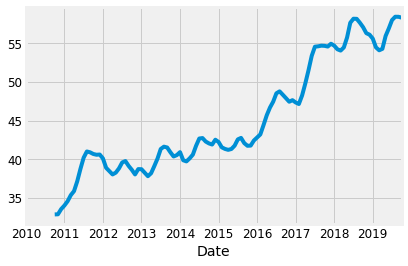

In [12]:
MA = renew_sum.rolling(10).mean()
MA.plot()

## Multi Variate ML Model

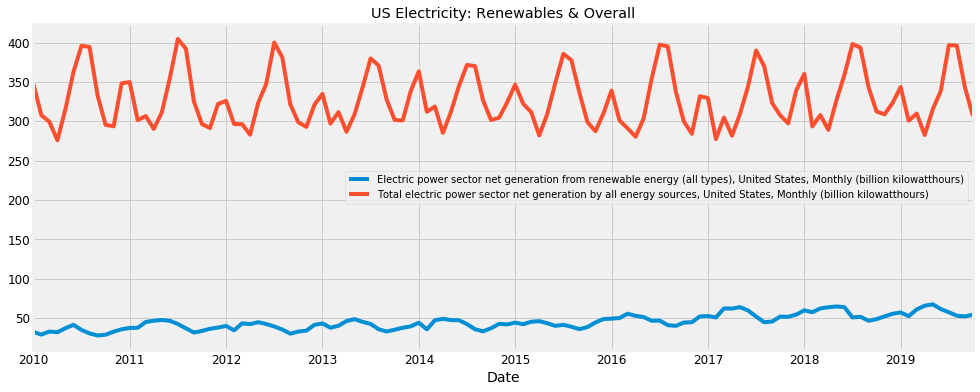

In [13]:
renew_sum.plot(figsize=(15, 6))
total.plot()
plt.legend()
plt.title("US Electricity: Renewables & Overall")
plt.show()

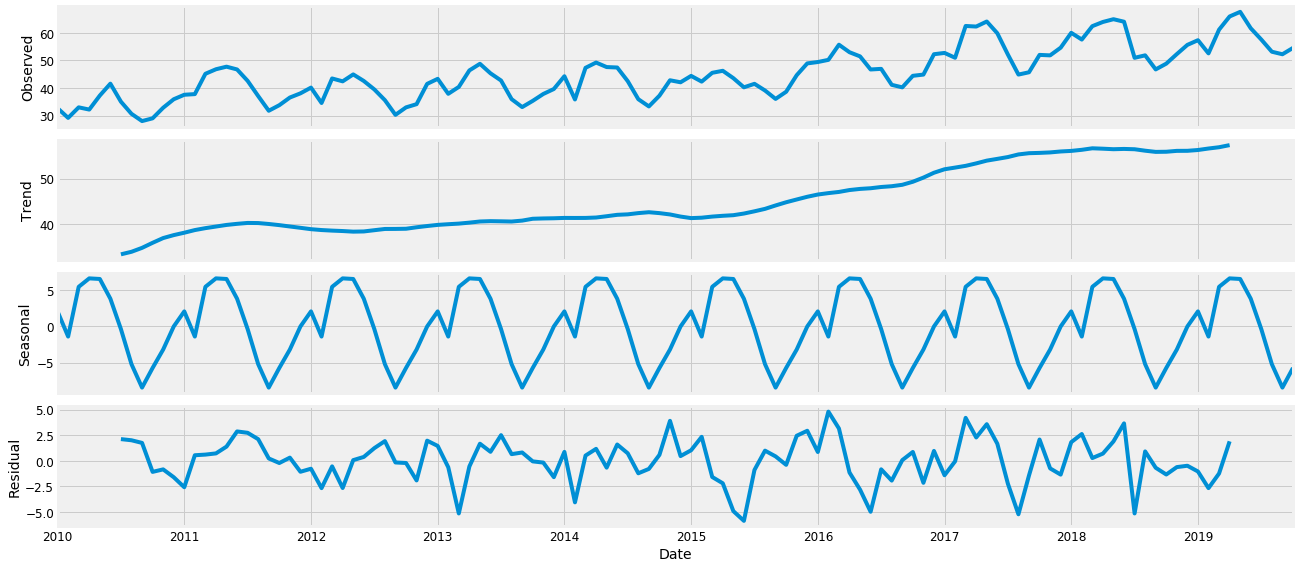

In [14]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(renew_sum, model='additive')
fig = decomposition.plot()
plt.show()

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(renew_sum,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1231.290568159364
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1007.9104555606971
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:638.9793675816361
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:548.9354336804772
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:615.4348653050127
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:586.2842592074885
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:553.8907214115611
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:544.6305171151928
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1079.5770209738305
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:877.0567551958459
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:587.5081525595192
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:514.146091329466
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:584.365035281418
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:541.4114254699134
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:524.6583087457357
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:514.8776931827056
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:670.1736759963538
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:572.9862092937728
ARIMA(0, 1

In [17]:
mod = sm.tsa.statespace.SARIMAX(renew_sum,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3996      0.156      2.568      0.010       0.095       0.705
ma.L1         -0.8563      0.092     -9.313      0.000      -1.037      -0.676
ar.S.L12      -0.3564      0.094     -3.800      0.000      -0.540      -0.173
sigma2         9.2898      1.619      5.737      0.000       6.116      12.463


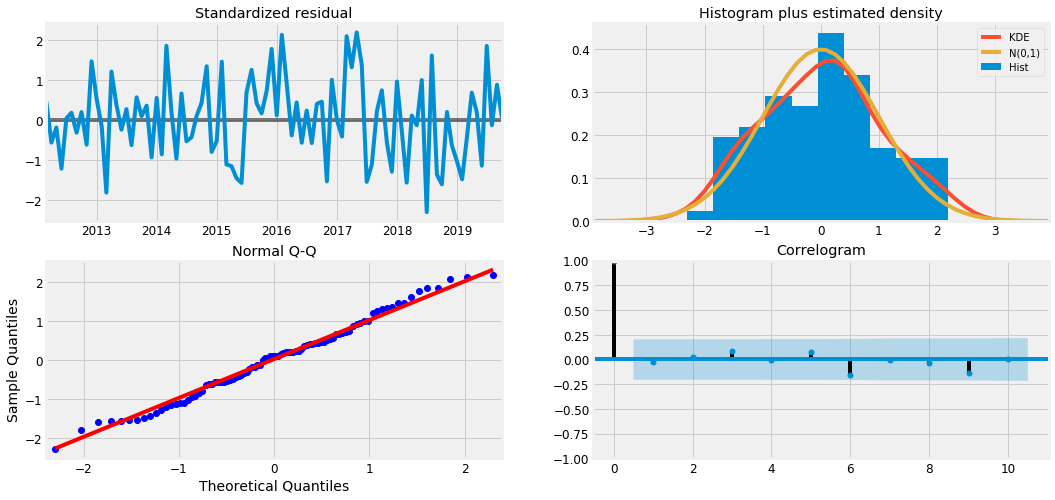

In [18]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

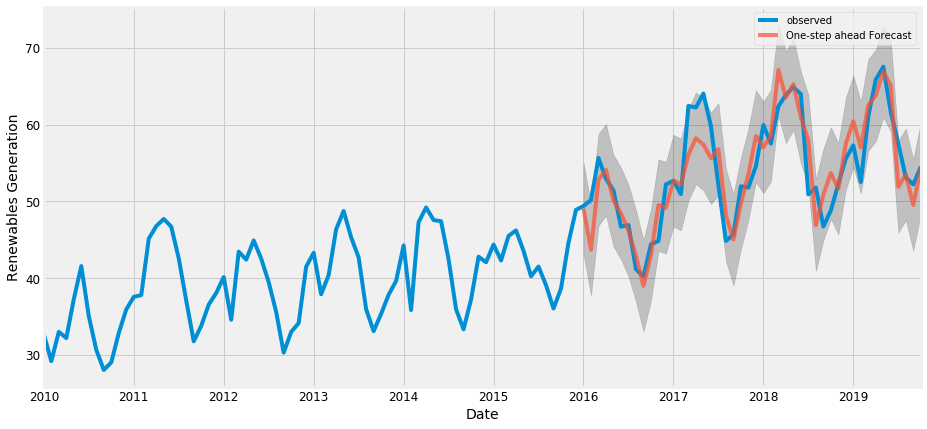

In [41]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = renew_sum['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)


ax.set_xlabel('Date')
ax.set_ylabel('Renewables Generation')

plt.legend()
plt.show()

In [47]:
y_forecasted = pred.predicted_mean
y_truth = renew_sum['2010-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 11.3


In [48]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 3.36


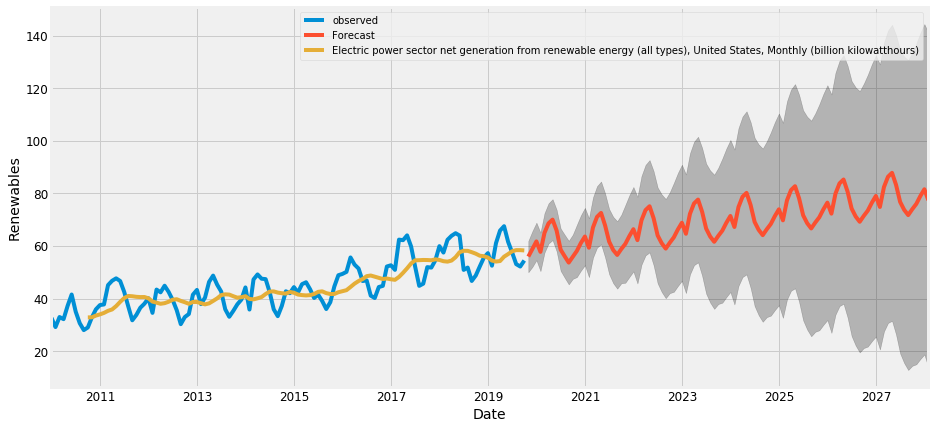

In [49]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = renew_sum.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Renewables')
MA.plot()
plt.legend()
plt.show()